In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from helpers.qec_helpers import *
from helpers.gates import *
from helpers.steane_helpers import *
from helpers.errors import *
from helpers.fault_tolerance import *

# Modelling and simulating noisy quantum computers

## Depolarizing Channel:
### Simulates bit and phase flips due to gate infidelities with in the circuit (probability $p_1$)
$$ K_{D_0} = \sqrt{1-p_1}, \quad K_{D_1} = \sqrt{\frac{p_1}{3}}X, \quad K_{D_2} = \sqrt{\frac{p_1}{3}}Z, \quad K_{D_3} = \sqrt{\frac{p_1}{3}}Y$$
$$ \rho \mapsto D(\rho) = \sum_{i = 0}^{3}K_{D_i}\rho K^\dagger_{D_i}$$


<u>Single qubit gate model:</u> error after single qubit gate according to single qubit error rates

This example will show a hadamard gate but all other single qubit gate operations will work similarly.

In [93]:
psi = np.array([1, 0])
rho = np.kron(psi, psi[np.newaxis].conj().T)

rho_prime = np.dot(sigma_x, np.dot(rho, sigma_x.conj().T))

print(rho)
print(rho_prime)

D_rho = qubit_gate_error_matrix(rho_prime, p_1, 0, 1)
print('Density Matrix after errored gate operation: \n', D_rho)

[[1 0]
 [0 0]]
[[0 0]
 [0 1]]
Density Matrix after errored gate operation: 
 [[6.66666667e-04+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.99333333e-01+0.j]]


In [21]:
psi = np.array([1, 0]) # initial state
gate = sigma_x # single qubit gate we want to implement

psi_prime = np.dot(gate, psi) # state after perfect gate operation
print('Vector state after perfect gate operation: \n', psi_prime)
rho = np.kron(psi_prime, psi_prime[np.newaxis].conj().T)
print('Density matrix after perfect gate operation: \n', rho.reshape(2,2))
print('- - - - - - - - - - ')
p_1 = 0.001 # error probability of the hadamrd gate operation

D_rho = qubit_gate_error_matrix(rho, p_1, 0, 1)
print('Density Matrix after errored gate operation: \n', D_rho)

Vector state after perfect gate operation: 
 [0 1]
Density matrix after perfect gate operation: 
 [[0 0]
 [0 1]]
- - - - - - - - - - 
Density Matrix after errored gate operation: 
 [[6.66666667e-04+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 9.99333333e-01+0.j]]


In [94]:
# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(D_rho)):
    prob_sum += np.abs(D_rho[i,i])
    state_probs = np.append(state_probs, D_rho[i,i])
    
print(state_probs[0], state_probs[1])

print('total probabilities: ', prob_sum)


(0.0006666666666666666+0j) (0.9993333333333334+0j)
total probabilities:  1.0


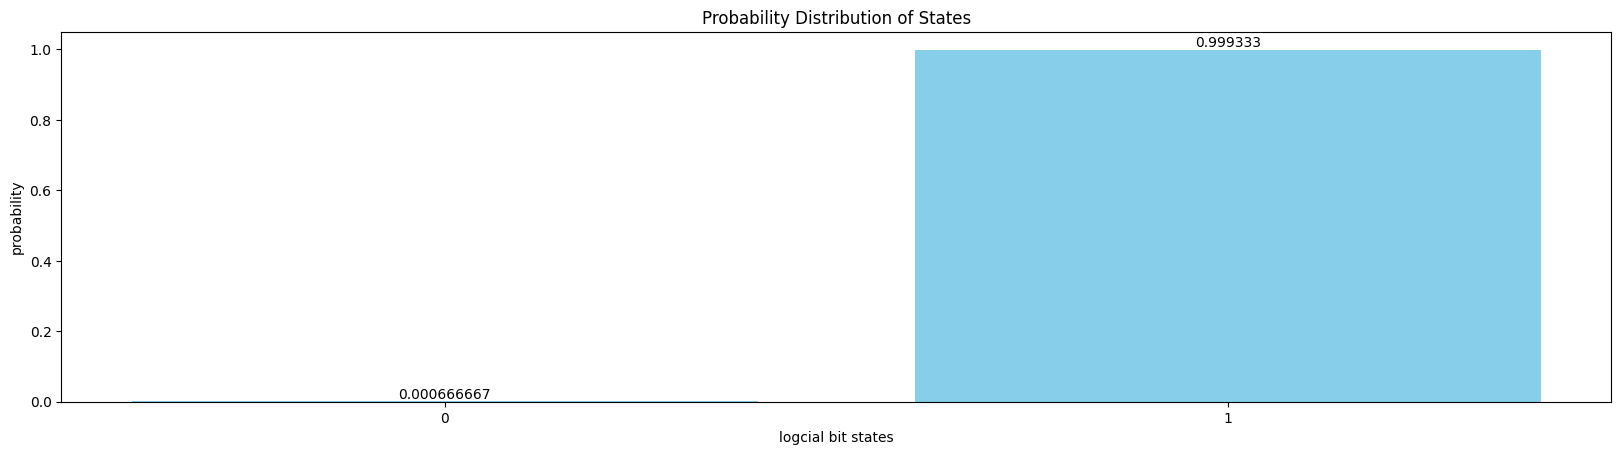

In [95]:
bits = vector_state_to_bit_state(state_probs, 1)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs, label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

<u> Two qubit gate model:</u> Error occurs after a two qubit gate according to two qubit error rates


This example will use a CNOT matrix between 2 qubits in a 3 qubit system. We will first show all-to-all connectivity and then restrict to line to line (after that grid will work similarly to both of these)

In [99]:
# In both examples we will use the following information #
zero = np.array([1, 0])
one = np.array([0, 1])
psi = np.kron(one, np.kron(zero, one)) # set an initial_state
rho = np.kron(psi, psi[np.newaxis].conj().T)

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.01
p_q2 = 0.00001

In [100]:
# 2 adjacent qubits all-to-all connectivity CNOT gate example #
cnot_gate = CNOT(0, 1, 3) # CNOT gate with q0 as control and q1 as target

rho_prime = np.dot(cnot_gate, np.dot(rho, cnot_gate.conj().T)) # apply our cnot gate

D_rho = qubit_gate_error_matrix(rho_prime, p_q1, 1, 3) # apply our error gate

final_rho = D_rho

print_state_info(final_rho.reshape(64, 1), 3)

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(D_rho)):
    prob_sum += np.abs(D_rho[i,i])
    state_probs = np.append(state_probs, D_rho[i,i])
    
print('total probability: ', prob_sum)

101 :  (0.006666666666666668+0j)
111 :  (0.9933333333333333+0j)
total probability:  1.0


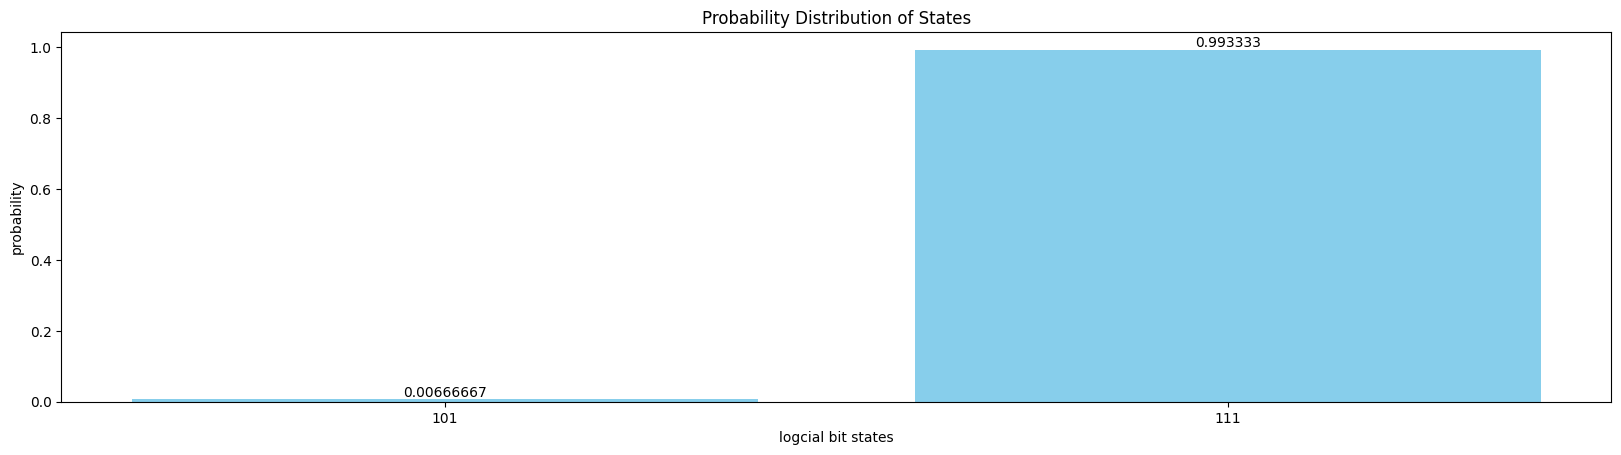

In [101]:
bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

In [102]:
# 2 non-adjacent qubits all-to-all connectivity CNOT gate example #
cnot_gate = CNOT(2, 0, 3) # CNOT gate with q2 as control and q0 as target

rho_prime = np.dot(cnot_gate, np.dot(rho, cnot_gate.conj().T)) # apply our cnot gate

D_rho = qubit_gate_error_matrix(rho_prime, p_q0, 0, 3) # apply our error gate

final_rho = D_rho

print_state_info(final_rho.reshape(64, 1), 3)

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(D_rho)):
    prob_sum += np.abs(D_rho[i,i])
    state_probs = np.append(state_probs, D_rho[i,i])
    
print('total probabilities: ', prob_sum)


011 :  (0.9999333333333333+0j)
111 :  (6.666666666666667e-05+0j)
total probabilities:  1.0


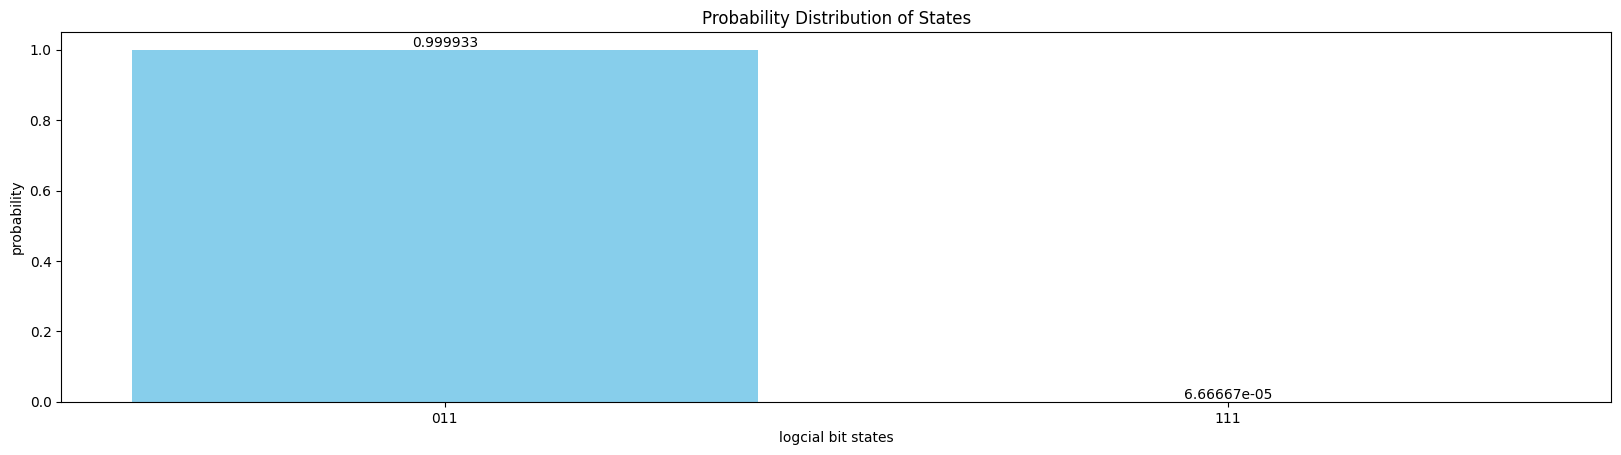

In [103]:
bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

Now focussing on line connectivity. We will use our non_adj_CNOT function in this example since the only thing that would change is that an error would be applied after each gate operation. 

In [143]:
### Apply a non-adjacent CNOT gate between 2 qubits in a system with line connectivity and errors ###
def errored_non_adj_CNOT(psi, control, target, qubit_error_probs):
    # psi: the vector state representation of your system
    # control: control qubit index (starting from 0)
    # target: target qubit index (starting from 0) (must be a larger index than control)
    # qubit_error_probs: an array of the probability for errors of each qubit in your system
    
    # find our density matrix
    rho = np.kron(psi, psi[np.newaxis].conj().T)
    
    # How many total qubits are in our vector representation
    tot_qubits = int(np.log(len(psi))/np.log(2))
    
    p = target - control # used to index over all gates neeeded to compose final gate
    all_dots = np.array([[]]) # array used to keep track of the components we will combine at the end

    # Adds the dimensions needed depending on the tot_qubits
    n1 = control # exponent used to tensor the left side identity matrix for our full system
    n2 = tot_qubits - target - 1 # exponent used to tensor the right side identity matrix for our full system
    
    # Applies the gates twice (square in our formula)
    for k in range(0,2):
        if k != 0:
            rho = error_rho
        # Indexing over the values of p to get the first half of the formula
        for j in range(p):
            # Sets the next component of the matrix multiplication up
            next_dot = np.kron(np.identity(2**(j)), np.kron(cnot, np.identity(2**(p-j-1))))
            next_dot = np.kron(np.identity(2**(n1)), np.kron(next_dot, np.identity(2**(n2))))

            # Adds the components to the array and multiplies them together
            if j == 0:
                all_dots = np.array([next_dot]) # adds the perfect gate to an array
                gate = all_dots[j] # sets the current gate
                # applies the perfect gate to our density matrix
                perfect_gate_rho = np.dot(gate, np.dot(rho, gate.conj().T)) 
                # apply our error gate and find the new density matrix
                error_rho = qubit_gate_error_matrix(
                    perfect_gate_rho, qubit_error_probs[j+control+1], j+control, tot_qubits)
                print(qubit_error_probs[j+control+1])
            else:
                all_dots = np.append(all_dots, [next_dot], axis = 0) # adds the perfect gate to an array
                gate = all_dots[j] # sets the current gate
                # applies the perfect gate to our density matrix
                perfect_gate_rho = np.dot(gate, np.dot(error_rho, gate.conj().T)) 
                # apply our error gate and find the new density matrix
                error_rho = qubit_gate_error_matrix(
                    perfect_gate_rho, qubit_error_probs[j+control+1], j+control, tot_qubits)
                print(qubit_error_probs[j+control+1])

                    
        # Indexing over values of p such that we get the 2nd half of the equation together
        for j in range(p - 2):
            gate = all_dots[p-j-2] # sets the current gate
            # applies the perfect gate to our density matrix
            perfect_gate_rho = np.dot(gate, np.dot(error_rho, gate.conj().T)) 
            # apply our error gate and find the new density matrix
            error_rho = qubit_gate_error_matrix(perfect_gate_rho, qubit_error_probs[p-j-2], j+control, tot_qubits)
            print(qubit_error_probs[p-j-2])

         
    return error_rho # returns the density matrix of your system

0.001
1e-05
0.001
1e-05
total probability:  1.0000000000000004


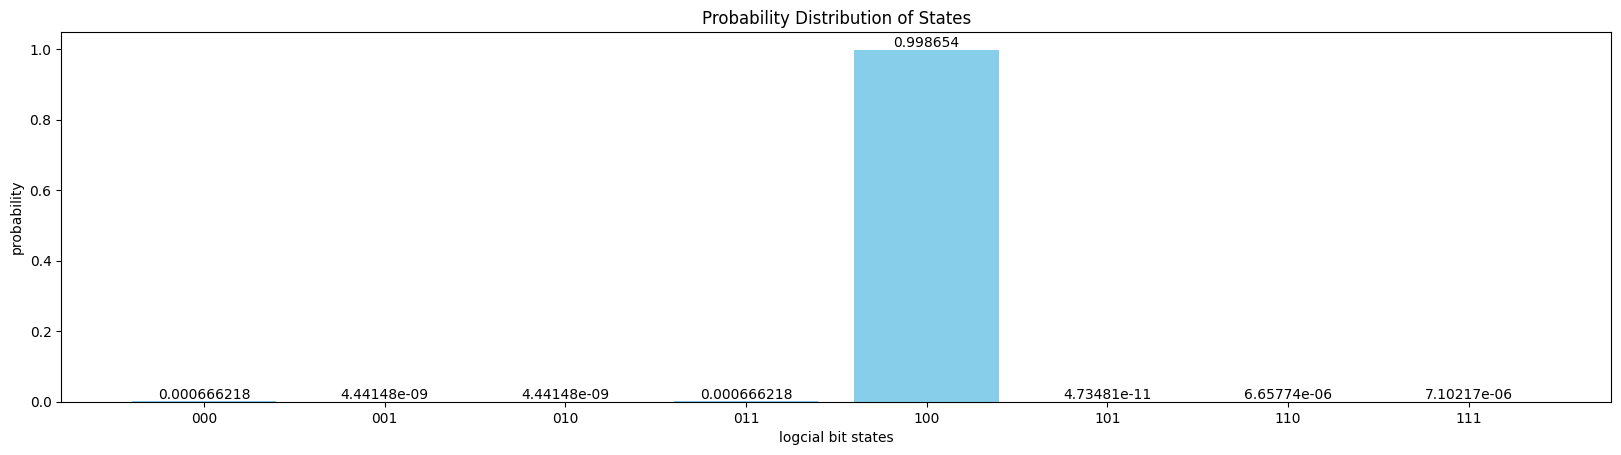

In [144]:
# 2 non-adjacent qubits line connectivity CNOT gate example #
# CNOT gate with q0 as control and q2 as target
psi = np.kron(one, np.kron(zero, one))

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.001
p_q2 = 0.00001

qubit_error_probs = np.array([p_q0, p_q1, p_q2])
rho_prime = errored_non_adj_CNOT(psi, 0, 2, qubit_error_probs) # apply an errored line connected CNOT gate

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(rho_prime)):
    prob_sum += np.abs(rho_prime[i,i])
    state_probs = np.append(state_probs, rho_prime[i,i])
    
print('total probability: ', prob_sum)
bits = vector_state_to_bit_state(state_probs, 3)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

0.01
0.0001
0.01
0.0001
total probability:  1.0


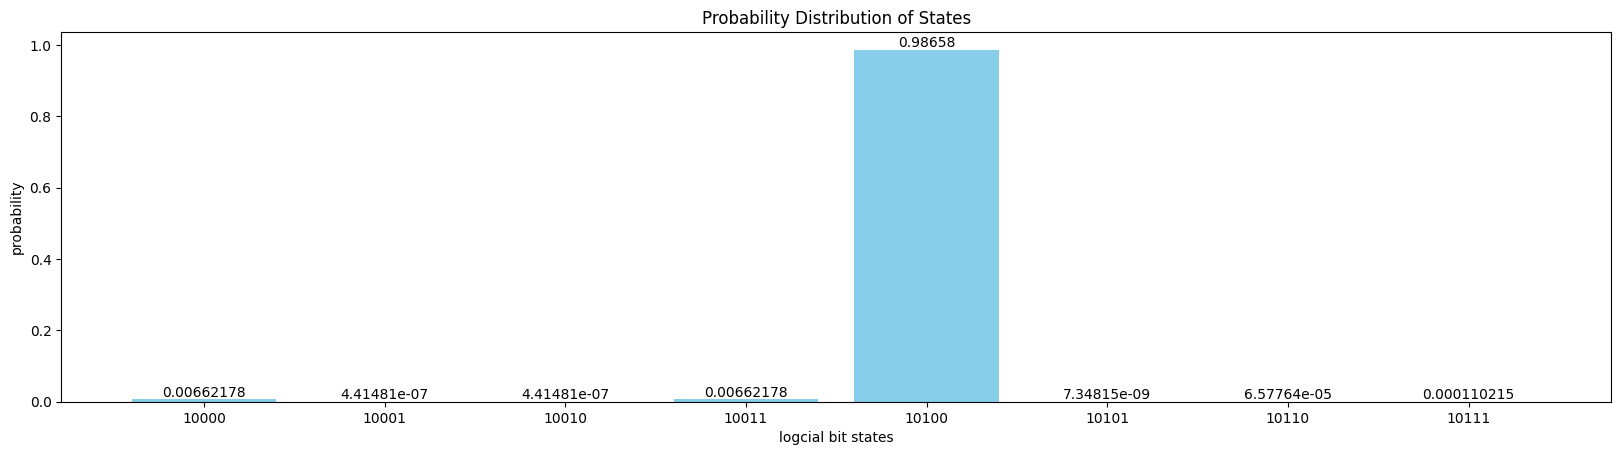

In [150]:
# 2 non-adjacent qubits line connectivity CNOT gate example with 5 qubits #
# CNOT gate with q0 as control and q2 as target
psi = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, one))))

# probability of gate error for each qubit:
p_q0 = 0.0001
p_q1 = 0.001
p_q2 = 0.00001
p_q3 = 0.01
p_q4 = 0.0001

qubit_error_probs = np.array([p_q0, p_q1, p_q2, p_q3, p_q4])
rho_prime = errored_non_adj_CNOT(psi, 2, 4, qubit_error_probs) # apply an errored line connected CNOT gate

# probability of the density matrix is defined as Tr(p*rho)
prob_sum = 0
state_probs = np.array([])
for i in range(len(rho_prime)):
    prob_sum += np.abs(rho_prime[i,i])
    state_probs = np.append(state_probs, rho_prime[i,i])
    
print('total probability: ', prob_sum)
bits = vector_state_to_bit_state(state_probs, 5)[0]

# Plotting the error state probabilities
fig, ax = plt.subplots()
fig.set_figwidth(20)
error_state_bars = ax.bar(bits, state_probs[state_probs!=0], label = 'States Probability Distribution', color = 'skyblue')
plt.title('Probability Distribution of States')
plt.xlabel('logcial bit states') 
plt.ylabel('probability') 
ax.bar_label(error_state_bars)
plt.show()

## State Preparation and Measuremnt:

## Thermal Decoherence and Dephasing Channel: